<a href="https://colab.research.google.com/github/fralfaro/YP-DS-Sprints/blob/main/docs/DS/solutions/solucion_sprint_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 09

# Modelo Predictivo para la selección de regiones petroleras con el mayor margen de beneficio en la compañía minera OilyGiant

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span><ul class="toc-item"><li><span><a href="#Objetivos" data-toc-modified-id="Objetivos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objetivos</a></span></li></ul></li><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inicialización</a></span><ul class="toc-item"><li><span><a href="#Cargar-datos" data-toc-modified-id="Cargar-datos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cargar datos</a></span></li><li><span><a href="#Explorar-datos-iniciales" data-toc-modified-id="Explorar-datos-iniciales-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Explorar datos iniciales</a></span></li><li><span><a href="#Visualización-de-datos" data-toc-modified-id="Visualización-de-datos-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Visualización de datos</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></li><li><span><a href="#Preparación-de-datos-fuente" data-toc-modified-id="Preparación-de-datos-fuente-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparación de datos fuente</a></span><ul class="toc-item"><li><span><a href="#Eliminación-columna-id" data-toc-modified-id="Eliminación-columna-id-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Eliminación columna <code>id</code></a></span></li><li><span><a href="#Estandarización-de-datos" data-toc-modified-id="Estandarización-de-datos-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Estandarización de datos</a></span></li><li><span><a href="#Segmentación-de-datos-fuente" data-toc-modified-id="Segmentación-de-datos-fuente-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Segmentación de datos fuente</a></span></li></ul></li><li><span><a href="#Entrenamiento-del-modelo" data-toc-modified-id="Entrenamiento-del-modelo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Entrenamiento del modelo</a></span></li><li><span><a href="#Volumen-de-reservas-en-un-pozo" data-toc-modified-id="Volumen-de-reservas-en-un-pozo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Volumen de reservas en un pozo</a></span></li><li><span><a href="#Cálculo-de-ganancias-para-pozos-seleccionados" data-toc-modified-id="Cálculo-de-ganancias-para-pozos-seleccionados-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cálculo de ganancias para pozos seleccionados</a></span></li><li><span><a href="#Cálculo-de-pérdidas-y-ganancias-para-cada-región" data-toc-modified-id="Cálculo-de-pérdidas-y-ganancias-para-cada-región-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cálculo de pérdidas y ganancias para cada región</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

## Introducción

La compañía minera OilyGiant está buscando el mejor lugar para un nuevo pozo petrolero. Para esto se cuenta con datos sobre muestras de crudo de tres regiones y se conocen los parámetros de cada pozo petrolero de la región. La empresa busca establecer cuál de estas tres regiones genera el mayor margen de beneficio, por lo que será necesario desarrollar un modelo de machine learning que nos permita establecer los riesgos y beneficios potenciales de cada región, y así poder determinar qué región es la más apta para un nuevo pozo.

### Objetivos

1. Recolectar los parámetros del pozo de petróleo en la región seleccionada: calidad del petróleo y volumen de reservas.
2. Construir un modelo para predecir el volumen de reservas en los nuevos pozos.
3. Seleccionar los pozos de petróleo con los valores estimados más altos.
4. Eligir la región con el mayor beneficio total para los pozos de petróleo seleccionados.

## Inicialización

Primeramente, vamos a importar todas las librerías necesarias para la construcción correcta de un modelo de machine learning. En este caso, trabajaremos con las librerías `Pandas`, `Numpy`, `Seaborn` y `Scikit-Learn`, que permiten leer correctamente los archivos, trabajar con bases de datos, trazar gráficos y construir modelos predictivos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Cargar datos

En segundo lugar, importamos los datasets con la información de la exploración geológica de las tres regiones potenciales para un nuevo pozo petrolero. Para esto utilizaremos la función `read_csv` de pandas y pasaremos como argumento la ubicación de cada archivo. Guardaremos los datos de la primera región en la variable `region_1`, de la segunda región en `region_2` y de la tercera región en `region_3`.

In [3]:
path = "/content/drive/MyDrive/DataScience/TripleTen/Sprints/DS/"

region_1 = pd.read_csv(path + 'geo_data_0.csv')
region_2 = pd.read_csv(path + 'geo_data_1.csv')
region_3 = pd.read_csv(path + 'geo_data_2.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen inicio.
</div>

### Explorar datos iniciales

Con los datasets correctamente importados, ahora procedemos a realizar una exploración inicial de los datos para las tres regiones. En este caso llamaremos al atributo `shape`, y los métodos `head` e `info` para los tres datasets.

**REGIÓN 1**

In [4]:
region_1.shape

(100000, 5)

In [ ]:
region_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**REGIÓN 2**

In [ ]:
region_2.shape

(100000, 5)

In [ ]:
region_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**REGIÓN 3**

In [ ]:
region_3.shape

(100000, 5)

In [ ]:
region_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


En los tres datasets nos encontramos con 100000 filas u observaciones y cinco columnas que contienen la siguiente información:

- `id` — identificador único de pozo de petróleo
- `f0, f1, f2` — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- `product` — volumen de reservas en el pozo de petróleo (miles de barriles).

La columna `id` se encuentra como tipo objeto y las columnas restantes son de tipo float, los tipos de datos son correctos, así que no requieren una posterior correción. A su vez, no se registran valores ausentes en ninguno de los tres datasets. Ahora revisaremos si existen duplicados, para esto llamaremos al método `duplicated` y `sum` a cada dataset a través de un bucle for.

In [ ]:
list_datasets = [region_1, region_2, region_3]

region_1.name = 'Región 1'
region_2.name = 'Región 2'
region_3.name = 'Región 3'

for i in list_datasets:
    duplicates =  i.duplicated().sum()
    print('Número de valores duplicados', i.name, ':', duplicates)

Número de valores duplicados Región 1 : 0
Número de valores duplicados Región 2 : 0
Número de valores duplicados Región 3 : 0


Podemos confirmar la ausencia de valores duplicados y ausentes en los tres datasets por lo que continuamos con el análisis exploratorio de variables numéricas y categóricas.

### Visualización de datos

En nuestros tres datasets se observa una variable discreta que corresponde al id de cada pozo, así que no vamos a trazar gráficos de esta variable. Por otro lado, se registran cuatro variables continuas, vamos a realizar un breve análisis exploratorio de cada variable en cada una de las tres regiones. Para esto construiremos una función `hist`, que nos devolverá un histograma de frecuencias de las columnas `f0`, `f1`, `f2` y `product`, la función contará con los siguientes argumentos:

- `region`: dataset de cada región.
- `region_name`: nombre de cada región
- `bins`: número de contenedores para trazar histogramas

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
En este caso te podría sugerir que empleases un bucle para reducir las líneas de código y el número de celdas. Pero todo está perfecto.
</div>

In [ ]:
def hist(region, region_name ='', bins=0):

# Almacenamos a las variables continuas en la variable numerical_data_1
    numerical_data= ['f0', 'f1', 'f2', 'product']

# Establecemos el número de filas y columnas para nuestros subplots
    a = 2 # número de filas
    b = 2 # número de columnas
    c = 1 # inicialización del conteo de plots

# Establecemos el tamaño de nuestra figura de subplots
    fig = plt.subplots(figsize=(10, 6))

# Construimos un bucle for que iterará por cada columna numérica y devolverá un histograma
    for i in numerical_data:
        plt.subplot(a, b, c)
        plt.title(i)
        region[i].hist(bins=bins, edgecolor = 'black', linewidth = 0.8)
        c = c + 1

    plt.suptitle(region_name)
    plt.tight_layout()
    plt.show()

Definida nuestra función, vamos a aplicarla a cada región, y también llamaremos al método describe para analizar más a fondo la distribución de nuestros datos en las tres regiones de este proyecto.

**REGIÓN 1**

In [ ]:
region_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


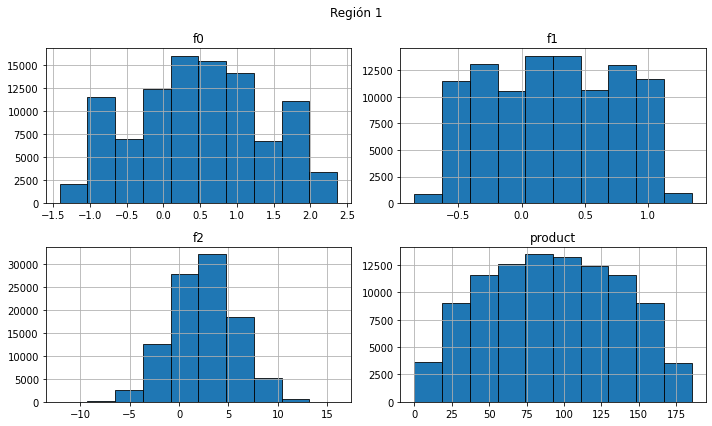

In [ ]:
hist(region_1, 'Región 1', 10)

En la REGIÓN 1 podemos observar una distribución más o menos normal para las variables `f0`, `f2` y `product`. Pudiendo establecer un ligero sesgo hacia la izquierda en las variables `f0`, `f1` y `f2`, en las cuales se registra una mediana ligeramente mayor a la media. Mientras que para la variable `product` se observa una asimetría positiva, con una media mayor a la mediana y una mayor desviación estándar. El volumen promedio de reservas en la región 1 es de 92.5 mil barriles.

**REGIÓN 2**

In [ ]:
region_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


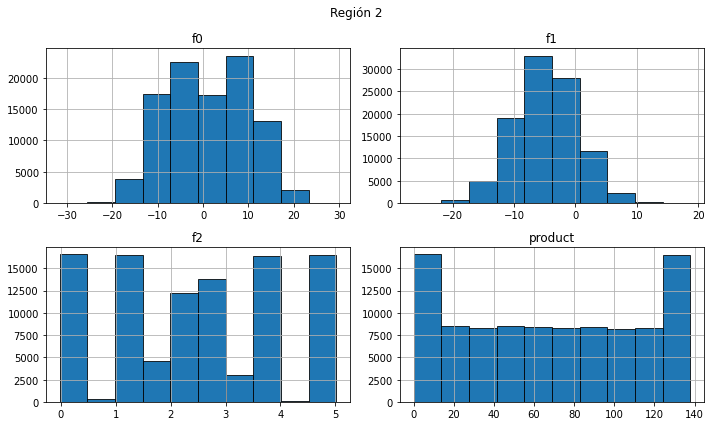

In [ ]:
hist(region_2, 'Región 2', 10)

En la REGIÓN 2 encontramos una distribución similar a una campana de Gauss para las regiones `f0` y `f1`, sin embargo se registra una asimetría negativa para `f0` y una asimetría positiva para `f1`. Para la variable `f2` encontramos una distribución no uniforme ni normal, registrando varios picos, a su vez se observa una asimetría positiva, con una media mayor a la mediana. Finalmente, para la variable `product` observamos una distribución uniforme a lo largo de los diferentes volúmenes de reserva, con un volumen promedio de reservas de 68.82 para la región 2.

**REGIÓN 3**



In [ ]:
region_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


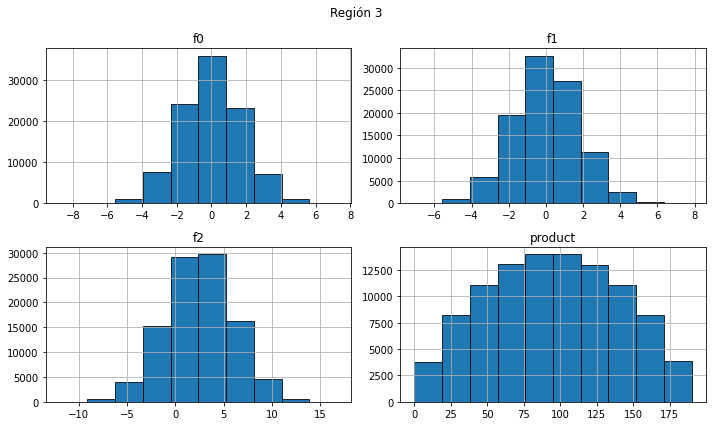

In [ ]:
hist(region_3, 'Región 3', 10)

En la REGIÓN 3 podemos observar una distribución similar a una normal para nuestras cuatro variables continuas, especialmente para las variables `f0` y `f1`, en las que se registra una mínima diferencia entre la media y la mediana; sin embargo, se puede establecer una ligera asimetría positiva tanto para `f0` como para `f1`. En la variable `f2` también se registra una asimetría positiva, con una media mayor a la mediana. Finalmente, para la variable `product` observamos un ligero sesgo hacia la derecha de nuestros datos, con un volumen promedio de 95 mil barriles para la región 3.

A continuación, realizaremos una análisis de correlación entre las variables de las tres regiones para establecer aquellas variables que presentan una mayor correlación con nuestra variable de interés `product`, para esto llamaremos a la función `corr` en nuestros tres datasets.

In [ ]:
region_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


En la REGIÓN 1 observamos una correlación positiva moderada a fuerte entre la variable `f2` y `product`, lo que indica que al incremento de f2, incrementa el volumen de petróleo en las reservas. También observamos una correlación positiva de moderada a baja con la variable `f0` y `product`. Por otro lado, existe una correlación negativa de moderada a débil entre `f1` y el volumen de producto. Finalmente, encontramos una correlación negativa moderada a fuerte entre `f1` y `f0`, y las correlaciones restantes son cercanas a cero, lo que indica una correlación pero no de forma lineal entre las variables.

In [ ]:
region_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000




Para la REGIÓN 2 encontramos una correlación fuerte entre la variable `f2` y `product`, de 0.999, lo que confirma una alta correlación lineal, por lo que al incrementar `f2`, incrementará `product`; quizás esto esté relacionado con las distribuciones no normales de ambas variables al analizar sus histogramas de frecuencias en este región. Finalizamos, registrando una correlación positiva de moderada a baja para las variables `f1` y `f0`, las correlaciones restantes son cercanas a cero.

In [ ]:
region_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


En la región 3, observamos una alta correlación positiva entre la variable `f2` y `product`, de 0.44, lo que indica que mientras mayor sea esta característica geológica, incrementará el volumen de petróleo encontrado en los diferente pozos de esta región. Este patrón se observa en las tres regiones estudiadas, por lo que `f2` será una característica importante al construir nuestro modelo. Finalmente, no se observa una correlación lineal fuerte entre las otras variables de la región 3.

### Conclusiones

1. Se importaron los datasets para las tres regiones de estudio, y se realizó una exploración inicial de los datos, en la cual no se registró valores ausentes ni duplicados en ninguno de los tres conjuntos de datos. A su vez, los tipos de datos registrados fueron los correctos, así que no necesitarán una corrección posterior.
2. Se realizó una análisis exploratorio de las variables numéricas en los tres dataset,  y se observó un comportamiento similar de los datos para la Región 1 y 3, con un volumen promedio superior a los 90 mil barriles para las dos regiones. Mientras que para la Región 2 se observó una distribución diferente de las variables, y el volumen promedio de reservas fue de 68 miles de barriles para esta región.
3. Se encontró una correlación positiva fuerte entre la variable `f2` y la variable `product` en las tres regiones, con una mayor correlación en la región 2, por lo que `f2` será una variable o característica importante al construir nuestro modelo de machine learning.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo en esta sección. Al igual que en el comentario anterior podría sugerirte la creación de una función y sumarle un bucle para obtener los mismos resultados pero en menos líneas de código. No obstante, la forma en que lo presentas tiene una alta legibilidad y facilitará la lectura de personas externas.
</div>

## Preparación de datos fuente

La empresa OilyGiant busca generar un modelo para predecir la región que mayor margen de ganancias genere, así que construiremos un modelo que prediga el volumen de reservas para cada región. Se trabajará con un modelo de aprendizaje supervisado con un objetivo de tipo numérico, en este caso las características serán las variables `f0`, `f1`, `f2` y el objetivo a partir del cual se realizarán predicciones, será la variable `product`.

A continuación preparemos los datos para la construcción de nuestro modelo.

### Eliminación columna `id`

Iniciaremos con la eliminación de la columna `id` que no será necesaria para la construcción de nuestro modelo predictivo ya que solo guarda información sobre la identificación de cada pozo en las diferentes regiones. Simplemente aplicaremos drop y pasaremos como argumento el nombre de la columna.

In [ ]:
region_1 = region_1.drop('id', axis=1)

region_2 = region_2.drop('id', axis=1)

region_3 = region_3.drop('id', axis=1)

### Estandarización de datos

Continuamos con la estandarización de características numéricas, esto se realiza para evitar que el algoritmo determine que una característica es más importante que la otra, al escalar los valores numéricos todas las características son igualmente importantes durante la ejecución del algoritmo. Para esto utilizaremos StandardScaler de la librería Scikit-Learn que ayuda a obtener una distribución estandarizada, con una media de cero y una desviación estándar de uno.

In [ ]:
# Guardamos las características numéricas en la variable numeric_data
numeric_data = ['f0', 'f1', 'f2']

In [ ]:
# Guardamos StandardScaler en la variable scaler
scaler = StandardScaler()

**REGIÓN 1**

In [ ]:
# Ajustamos con las características numéricas de la región 1
scaler.fit(region_1[numeric_data])

# Transformamos las características numéricas con transform
region_1[numeric_data] = scaler.transform(region_1[numeric_data])

# Comprobamos la estandarización con la media y desviación estándar de cada característica
pd.DataFrame({
    'variable_1': ['f0', 'f1', 'f2'],
    'mean_1': [region_1['f0'].mean().round(), region_1['f1'].mean().round(), region_1['f2'].mean().round()],
    'std_1': [region_1['f0'].std().round(), region_1['f1'].std().round(),region_1['f2'].std().round()]

})

,variable_1,mean_1,std_1
0,f0,0.0,1.0
1,f1,-0.0,1.0
2,f2,0.0,1.0


**REGIÓN 2**

In [ ]:
# Ajustamos con las características numéricas de la región 2
scaler.fit(region_2[numeric_data])

# Transformamos las características numéricas con transform
region_2[numeric_data] = scaler.transform(region_2[numeric_data])

# Comprobamos la estandarización con la media y desviación estándar de cada característica
pd.DataFrame({
    'variable_2': ['f0', 'f1', 'f2'],
    'mean_2': [region_2['f0'].mean().round(), region_2['f1'].mean().round(), region_2['f2'].mean().round()],
    'std_2': [region_2['f0'].std().round(), region_2['f1'].std().round(),region_2['f2'].std().round()]

})

,variable_2,mean_2,std_2
0,f0,-0.0,1.0
1,f1,0.0,1.0
2,f2,0.0,1.0


**REGIÓN 3**

In [ ]:
# Ajustamos con las características numéricas de la región 3
scaler.fit(region_3[numeric_data])

# Transformamos las características numéricas con transform
region_3[numeric_data] = scaler.transform(region_3[numeric_data])

# Comprobamos la estandarización con la media y desviación estándar de cada característica
pd.DataFrame({
    'variable_3': ['f0', 'f1', 'f2'],
    'mean_3': [region_3['f0'].mean().round(), region_3['f1'].mean().round(), region_3['f2'].mean().round()],
    'std_3': [region_3['f0'].std().round(), region_3['f1'].std().round(),region_3['f2'].std().round()]

})

,variable_3,mean_3,std_3
0,f0,0.0,1.0
1,f1,-0.0,1.0
2,f2,-0.0,1.0


Las características de las tres regiones han sido correctamente estandarizadas presentando una desviación estándar de 1 y una media de 0.

### Segmentación de datos fuente

Una vez estandarizadas nuestras características numéricas y eliminadas las características que no serán necesarias para la construcción de nuestro modelo predictivo. Procedemos a la segmentación de datos fuente, en este caso se recomienda dividir los datos en un conjunto de entrenamiento y uno de validación, por lo que la proporción recomendada será de 75:25, el 75% para el entrenamiento y 25% para la validación.

Para realizar esta división vamos a crear la función `split_dataset` que tomará los datos de cada región y los dividirá en conjuntos de entrenamiento y validación. En primer lugar, la función establecerá las características y objetivo de cada región, para las características se utilizará la función drop en la columna `product`, y para el objetivo se llamará a `product` de cada región. Posteriormente, se utilizará la función para obtener las características y objetivo en el conjunto de entrenamiento y validación, para lo cual se establecerá test_size en 0.25 y random_state en 12345. La función solo requerirá de un argumento:

- `region`: el dataset de cada región.

In [ ]:
def split_dataset(region):
    # Establecemos las características y objetivo de cada región
    features = region.drop('product', axis=1)
    target = region['product']

    # Dividimos el conjunto de validación y entrenamiento con la función train_test_split
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                                       target,
                                                                                       test_size=0.25,
                                                                                      random_state=12345)
    # Devolvemos las característcas y objetivo del conjunto de validación y entrenamiento
    return features_train, features_valid, target_train, target_valid


Una vez establecida nuestra función `split_dataset` vamos a aplicar la función a cada región y guardaremos los nuevos conjuntos de datos en las variables `features_train` y `target_train` para el conjunto de entrenamiento, y `features_valid` y `target_valid` para el conjunto de validación. Finalmente comprobaremos que se haya dividido correctamente cada dataset llamando al atributo shape en cada variable de cada región.

In [ ]:
# Dividimos en conjunto de entrenamiento y validación a la region 1
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_dataset(region_1)

# Comprobamos que la división sea correcta.
print(
f'''REGIÓN 1 TAMAÑO DATOS
======================
Características conjunto de entrenamiento: {features_train_1.shape}
Objetivo conjunto de entrenamiento: {target_train_1.shape}
Características conjunto de validación: {features_valid_1.shape}
Objetivo conjunto de validación: {target_valid_1.shape}
''')

REGIÓN 1 TAMAÑO DATOS
Características conjunto de entrenamiento: (75000, 3)
Objetivo conjunto de entrenamiento: (75000,)
Características conjunto de validación: (25000, 3)
Objetivo conjunto de validación: (25000,)



In [ ]:
# Dividimos en conjunto de entrenamiento y validación a la region 2
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_dataset(region_2)

# Comprobamos que la división sea correcta.
print(
f'''REGIÓN 2 TAMAÑO DATOS
======================
Características conjunto de entrenamiento: {features_train_2.shape}
Objetivo conjunto de entrenamiento: {target_train_2.shape}
Características conjunto de validación: {features_valid_2.shape}
Objetivo conjunto de validación: {target_valid_2.shape}
''')

REGIÓN 2 TAMAÑO DATOS
Características conjunto de entrenamiento: (75000, 3)
Objetivo conjunto de entrenamiento: (75000,)
Características conjunto de validación: (25000, 3)
Objetivo conjunto de validación: (25000,)



In [ ]:
# Dividimos en conjunto de entrenamiento y validación a la region 2
features_train_3, features_valid_3, target_train_3, target_valid_3 = split_dataset(region_3)

# Comprobamos que la división sea correcta.
print(
f'''REGIÓN 3 TAMAÑO DATOS
======================
Características conjunto de entrenamiento: {features_train_3.shape}
Objetivo conjunto de entrenamiento: {target_train_3.shape}
Características conjunto de validación: {features_valid_3.shape}
Objetivo conjunto de validación: {target_valid_3.shape}
''')

REGIÓN 3 TAMAÑO DATOS
Características conjunto de entrenamiento: (75000, 3)
Objetivo conjunto de entrenamiento: (75000,)
Características conjunto de validación: (25000, 3)
Objetivo conjunto de validación: (25000,)



Se comprueba que el conjunto de entrenamiento presenta 75000 observaciones y el conjunto de validación 25000 en las tres regiones, esto corresponde con la proporción de 75:25 que se estableció desde un inicio, así que concluimos que la segmentación de datos fuente para las tres regiones ha sido realizada correctamente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

## Entrenamiento del modelo

Con la correcta segmentación de nuestros conjuntos de datos de las tres regiones, procedemos a entrenar nuestro modelo. En este proyecto se realizará un modelo de regresión lineal ya que es el algoritmo de aprendizaje más adecuado para nuestros datos, el resto de algoritmos no son lo suficientemente predecibles. Debemos entrenar los tres conjuntos de datos, así que construiremos una función `linear_regression`, que tomará los conjuntos de entrenamiento y validación de cada región y construirá un modelo de regresion lineal. La función constará de los siguientes argumentos:

- `features_train:` características conjunto de entrenamiento
- `target_train:` objetivo conjunto de entrenamiento
- `features_valid:` características conjunto de validación
- `target_valid:` objetivo conjunto de validación

La función entrenará el modelo con los conjuntos de entrenamiento de las tres regiones y devolverá las predicciones en base al conjunto de validación `predictions_valid`,  el volumen promedio de reservas previstas `volume_mean`, la raíz del error cuadrático medio `RECM` y el coeficiente de determinación `R2`.

In [ ]:
def linear_regression(features_train, target_train, features_valid, target_valid):
    # Entrenamos el modelo de regresión lineal con el conjunto de entrenamiento
    model = LinearRegression()
    model.fit(features_train, target_train)

    # Guardamos las predicciones de nuestro modelo entrenado en el conjunto de validación
    predictions_valid = model.predict(features_valid)

    # Calculamos el volumen promedio, RECM y R2
    volume_mean = predictions_valid.mean()
    RECM = mean_squared_error(target_valid, predictions_valid)**0.5
    R2 = model.score(features_valid, target_valid)

    return volume_mean, RECM, R2, predictions_valid

Establecida nuestra función, procedemos a aplicarla en los conjuntos de entrenamiento y validación para las tres regiones, guardaremos los resultados en las variables `volumen_mean`, `RECM`, `R2` y `predictions`, con el número correspondiente dependiendo de cada región. También compararemos el volumen medio de las predicciones con el volumen medio de las respuestas correctas del conjunto de validación, los cuales se encuentran en `target_valid`.

In [ ]:
volume_mean_1, RECM_1, R2_1, predictions_1 = linear_regression(
    features_train_1, target_train_1, features_valid_1, target_valid_1)

print(
f'''REGIÓN 1
============================
Volumen promedio de reservas: {round(target_valid_1.mean(), 4)}
Volumen promedio de reservas previstas: {round(volume_mean_1, 4)}
RECM: {round(RECM_1, 4)}
R2: {round(R2_1, 4)}''')

REGIÓN 1
Volumen promedio de reservas: 92.0786
Volumen promedio de reservas previstas: 92.5926 
RECM: 37.5794
R2: 0.2799


In [ ]:
volume_mean_2, RECM_2, R2_2, predictions_2 = linear_regression(
    features_train_2, target_train_2, features_valid_2, target_valid_2)

print(
f'''REGIÓN 2:
============================
Volumen promedio de reservas: {round(target_valid_2.mean(), 4)}
Volumen promedio de reservas previstas: {round(volume_mean_2, 4)}
RECM: {round(RECM_2, 4)}
R2: {round(R2_2, 4)}''')

REGIÓN 2:
Volumen promedio de reservas: 68.7231
Volumen promedio de reservas previstas: 68.7285
RECM: 0.8931
R2: 0.9996


In [ ]:
volume_mean_3, RECM_3, R2_3, predictions_3 = linear_regression(
    features_train_3, target_train_3, features_valid_3, target_valid_3)

print(f'''REGIÓN 3:
============================
Volumen promedio de reservas: {round(target_valid_3.mean(), 4)}
Volumen promedio de reservas previstas: {round(volume_mean_3, 4)}
RECM: {round(RECM_3, 4)}
R2: {round(R2_3, 4)}''')

REGIÓN 3:
Volumen promedio de reservas: 94.8842
Volumen promedio de reservas previstas: 94.965
RECM: 40.0297
R2: 0.2052


Al analizar los resultados de nuestros modelos para las tres regiones, podemos establecer que no existe una diferencia grande entre el volumen promedio de reservas del conjunto de validación con el volumen promedio de las predicciones realizadas por nuestros modelos. La región 2 es la que presenta el error cuádratico medio más bajo, mientras que las regiones 1 y 3 presentan un error más elevado de 37 y 40 respectivamente. Al analizar el coeficiente de determinación, la región 2 presenta el coeficiente más elevado de 0.99, lo cual indicaría un modelo casi perfecto; mientras que las regiones 1 y 3 presentan un R2 de 0.20 y 0.27, por lo que funcionan tan bien como la media.

De los modelos para cada región, se puede establecer que el modelo para la región 2 es el que mejor predice el volumen de reservas, ya que presenta el error más bajo y coeficiente de determinación más alto. Sin embargo, la región 1 y 3 presentaron el volumen promedio de reservas más alto, por encima de los 90 miles de barriles.

## Volumen de reservas en un pozo

Ahora será necesario prepararnos para el cálculo de ganancias, para esto vamos a considerar las condiciones que la empres OilyGiant ha puesto para calcular el beneficio, estas son:

- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

Guardaremos la información relevante para el cálculo en las siguiente variables:
- `points`: el número de puntos de estudio en la variable
- `best_points`: los mejores 200 puntos o con mayor volumen de reservas
- `budget_200`: el presupuesto para el desarrollo de 200 pozos (en dólares)
- `revenue_per_barril`: la ganancia por barril (en dólares)
- `renevue_per_unit`: la ganancia por unidad de producto (en dólares)

In [ ]:
points = 500
best_points = 200
budget_200 = 100000000
revenue_per_barril = 4.5
revenue_per_unit = 4500

Una vez analizadas las condiciones de la empresa y almacenados los valores clave en variables separadas, vamos a proceder a calcular el volumen de reservas suficiente para desarrollar un nuevo pozo sin pérdidas. Empezaremos calculando el presupuesto necesario para el desarrollo de un pozo, para esto dividiremos el presupuesto para el desarrollo de 200 pozos `budget_200` entre los 200 mejores puntos `best_points`, guardaremos este resultado en `cost_one`.

In [ ]:
cost_one = budget_200/best_points
print('Presupuesto para el desarrollo de un pozo:', cost_one)

Presupuesto para el desarrollo de un pozo: 500000.0


Si consideramos que por unidad de producto (miles de barriles) se gana 4500, ahora calcularemos a partir del presupuesto de 500000 para el desarrollo de un pozo, qué volumen de reservas será necesaria para desarrollar un nuevo pozo sin pérdidas. Simplemente dividiremos `cost_one` entre `revenue_per_unit`. A su vez, calcularemos el volumen promedio de reservas para cada región y compararemos los resultados.

In [ ]:
volume_one = cost_one/revenue_per_unit
print('Volumen de reservas para desarrollar un nuevo pozo sin pérdidas:', round(volume_one, 2))

Volumen de reservas para desarrollar un nuevo pozo sin pérdidas: 111.11


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo. Todo ha sido calculado correctamente.
</div>

In [ ]:
print('Volumen medio de reservas Región 1:', round(region_1['product'].mean(), 3))
print('Volumen medio de reservas Región 2:', round(region_2['product'].mean(), 3))
print('Volumen medio de reservas Región 3:', round(region_3['product'].mean(), 3))

Volumen medio de reservas Región 1: 92.5
Volumen medio de reservas Región 2: 68.825
Volumen medio de reservas Región 3: 95.0


Se requiere de 111.11 miles de barriles para desarrollar un nuevo pozo sin pérdidas, al comparar este resultados con el volumen promedio de reservas para cada región, podemos establecer que ninguna de las tres regiones genera el volumen necesario para evitar pérdidas. En todas las regiones el coste de bienes o el presupuesto utilizado por la empresa para desarrollar pozos, va a ser mayor a las ganancias generadas por la explotación de los mismos.

## Cálculo de ganancias para pozos seleccionados

Dado que ninguna de las regiones genera un volumen promedio suficiente sin pérdidas, vamos a calcular las ganancias de un conjunto de pozos seleccionados y modelaremos las predicciones. Para lograr esto, construiremos la función `revenue` que tomará las predicciones (predictions_1, predictions_2, predictions_3) realizadas por el modelo de cada región y las ordenará en forma descendente, escogiendo aquellas predicciones con los valores más altos. Filtraremos el volumen objetivo de reservas en base a las predicciones más altas, utilizando para esto los índices de las predicciones. También estableceremos el número de pozos con los cuales se realizará el cálculo final. La función contará con los siguientes argumentos:

- `target`: objeto del conjunto de validación para cada región.
- `predictions`: predicciones realizadas por el modelo de cada región.
- `count`: número de pozos con los cuales se calculará el beneficio.

Para calcular el beneficio bruto, primero estableceremos el valor de ingresos para n pozos, para esto multiplicaremos el volumen total por las ganancias por unidad de producto `revenue_per_unit`. Luego, determinaremos el costo del desarrollo de n pozos, para lo cual multiplicaremos n pozos por el costo para el desarrollo de un pozo `cost_one`. Finalmente, restaremos el valor de ingresos de los costos de bienes.

In [ ]:
def revenue(target, predictions, count):

    # Tomamos las predicciones y las ordenamos de forma descendente
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False)
    # Seleccionamos los n pozos del objetivo en base a los índices de las predicciones más altas
    selected = target.reset_index(drop=True).iloc[predictions_sorted.index][:count]

    # Calculamos el volumen total, sumando el volumen de reservas de n pozos seleccionados
    volume_total = selected.sum()
    # Calculamos el ingreso multiplicando el volumen total por las ganancias por unidad de producto
    income = volume_total * revenue_per_unit
    # Calculamos el costo por el desarrollo de n pozos, considerando que la construcción de un pozo necesita 500000
    cost = count * cost_one

    # Calculamos el beneficio bruto restando el costo de los ingresos
    return income - cost

Establecida nuestra función, procedemos a calcular las ganancias para cada región, pasaremos como argumentos el objetivo de validación de cada región y sus respectivas predicciones. Tomaremos 200 pozos (mayor volumen de reservas) para realizar el cálculo, ya que OilyBank selecciona los 200 mejores puntos para calcular el beneficio.

In [ ]:
# Calculamos las ganancias para los 200 mejores pozos de cada región
revenue_1 = revenue(target_valid_1, predictions_1, 200)
revenue_2 = revenue(target_valid_2, predictions_2, 200)
revenue_3 = revenue(target_valid_3, predictions_3, 200)

# Construimos un dataframe con los resultados de ganancias por región
revenues = pd.DataFrame({
    'region': ['Región 1', 'Región 2', 'Región 3'],
    'revenue_dollars': [round(revenue_1, 2), round(revenue_2, 2), round(revenue_3, 2)]
})

revenues

,region,revenue_dollars
0,Región 1,33208260.43
1,Región 2,24150866.97
2,Región 3,27103499.64


Después de aplicar la función de ganancias a las tres regiones, se puede establecer que la región que generaría más ganancias a OilyGiant sería la región 1, generando 33 millones de dólares. A continuación, se encuentra la región 3 que genera 27 millones de dólares, y en último lugar, se encuentra la región 3, cuyas ganacias ascienden a 24 millones de dólres.

En base a estos resultados la mejor región para el desarrollo de pozos sería la región 1, esto considerando los 200 mejores pozos con el mayor volumen de producto. Sin embargo, será necesario calcular este beneficio en base a submuestras y tomando en cuenta los 500 puntos que se estudian durante la exploración de cada región.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien hecho. Siempre es mejor presentar los resultados de manera ordenada y específica. El código es importante pero lo que suma al final serán los resultados.
</div>

## Cálculo de pérdidas y ganancias para cada región

Establecida nuestra función para el cálculo de ganancias, ahora vamos a utilizar la técnica de bootstrapping para calcular la distribución del beneficio. Para esto construiremos la función `bootstrapping`, que generará 1000 submuestras a partir del objetivo de validación y sus predicciones, permitiendo un cálculo más acertado de las ganancias y pérdidas para cada una de las tres regiones.

El tamaño de las submuestras será igual a 500, ya que para la exploración de cada región se realiza un estudio de 500 puntos. De cada submuestra del objetivo de validación se obtendrá sus respetivas predicciones, y en base a esto se calculará las ganancias con nuestra función previamente establecida `revenue`, que tomará como parámetros la submuestra del conjunto de validación y sus respectivas predicciones para los 200 mejores pozos.

Los valores de ganancias para cada submuestra se guardarán en la lista `revenues`, la cual una vez haya sido transformada en un objeto Series, se obtendrá el beneficio promedio, el intervalo de confianza de 95% y el riesgo de pérdidas. Se calculará el intervalo de confianza inferior para el cuantil 0.025 y el superior para el cuantil 0.975. En el caso del riesgo o ganancia negativa, lo calcularemos como una probabilidad, dividiendo el número de valores menores a 0 entre el número total de valores de ganancias obtenidos a través de bootstrapping. La función contará con los siguientes parámetros:

- `target_valid`: objetivo de validación de cada región.
- `predictions`: predicciones realizadas por cada modelo por región.

La función nos devolverá la distribución de ganancias por región `revenues`, el beneficio promedio `mean_profit`, el intervalo de confianza `confidence_interval` y el riesgo de pérdida `loss_risk`.

In [ ]:
def bootstrapping(target_valid, predictions):
    # Creamos una instancia RandomState para que en cada iteración su estado cambie a aleatorio
    state = np.random.RandomState(12345)
    # Establecemos la lista revenues para guardar los valores de ganancias por submuestra
    revenues = []

    # Generamos un bucle for para un total de 1000 submuestras
    for i in range(1000):

        # Tomamos 500 puntos de cada submuestra y filtramos sus predicciones respestivas
        target_subsample = target_valid.reset_index(drop=True).sample(n=points, replace=True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        # Añadimos las ganancias a la lista append
        revenues.append(revenue(target_subsample, predictions_subsample, best_points))

    # Convertimos revenues en una serie
    revenues = pd.Series(revenues)

    # Calculamos el beneficio promedio, cuantiles y riesgo de pérdida
    mean_profit = revenues.mean()

    lower_quantile = round(revenues.quantile(0.025), 4)
    upper_quantile = round(revenues.quantile(0.975), 4)

    confidence_interval = [lower_quantile, upper_quantile]

    loss_risk = len(revenues[revenues < 0])/len(revenues)*100

    return revenues, mean_profit, confidence_interval, loss_risk

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente trabajo con la función. Las soluciones son más escalables y si algo sucede será mucho más fácil trabajar en ellas.
</div>

Definida nuestra función, la aplicaremos al objetivo de validación y predicciones de cada región, y guardaremos los resultados en las respectivas variables. Trazaremos histogramas de frecuencia para la distribución de ganancias de cada región, y mostraremos los resultados a través de la construcción de un dataframe `revenue_boots`.

In [ ]:
# Guardamos la distribución del beneficio, beneficio promedio, intervalo de confianza y riesgo de pérdida
revenues_1, mean_profit_1, confidence_interval_1, loss_risk_1 = bootstrapping(target_valid_1, predictions_1)
revenues_2, mean_profit_2, confidence_interval_2, loss_risk_2 = bootstrapping(target_valid_2, predictions_2)
revenues_3, mean_profit_3, confidence_interval_3, loss_risk_3 = bootstrapping(target_valid_3, predictions_3)

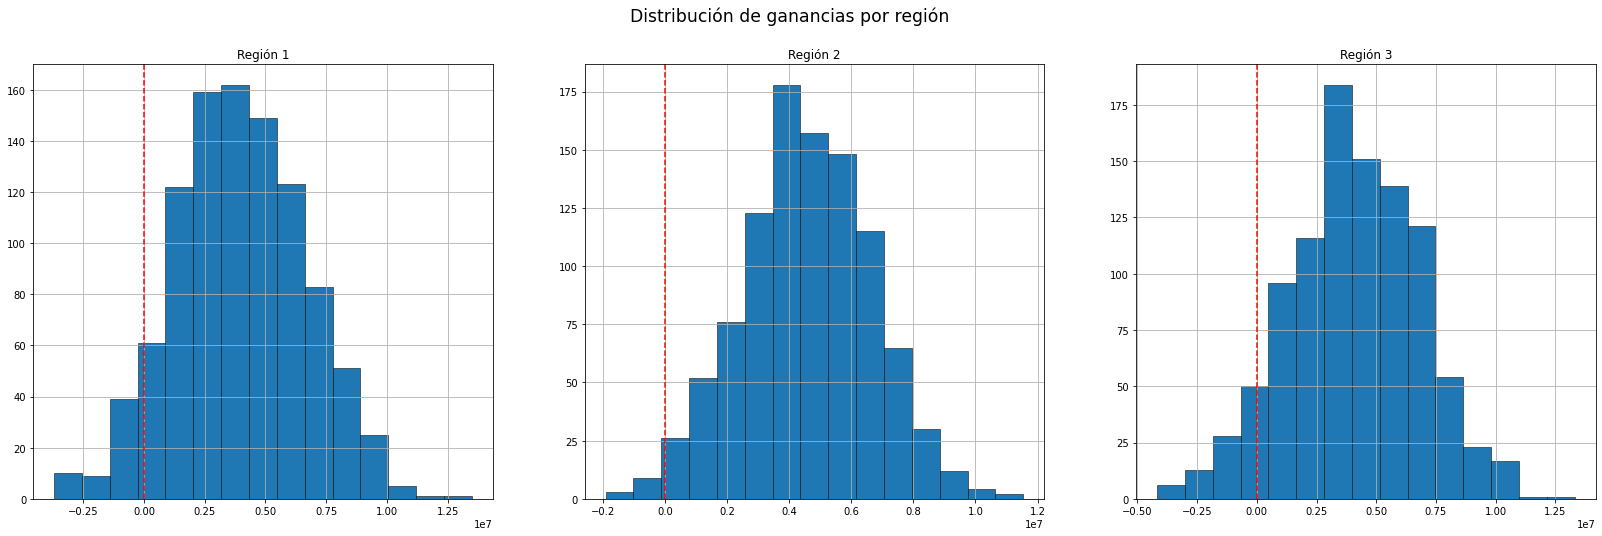

In [ ]:
# Trazamos histogramas para la distribución de ganancias en cada región
fig, axis = plt.subplots(ncols=3, nrows=1, figsize=(28, 8))
# Construimos un array de una dimensión 1-D
ax = axis.ravel()

# Trazamos histogramas de ganancias para los 200 mejores puntos de las tres regiones
revenues_1.hist(ax=ax[0], bins=15, edgecolor = 'black', linewidth = 0.5)
revenues_2.hist(ax=ax[1], bins=15, edgecolor = 'black', linewidth = 0.5)
revenues_3.hist(ax=ax[2], bins=15, edgecolor = 'black', linewidth = 0.5)

# Establecemos el título para cada eje de nuestro array con set_title
ax[0].set_title('Región 1')
ax[1].set_title('Región 2')
ax[2].set_title('Región 3')
# Colocamos una línea vertical en la posición 0
ax[0].axvline(x=0, color='r', ls='--')
ax[1].axvline(x=0, color='r', ls='--')
ax[2].axvline(x=0, color='r', ls='--')

plt.suptitle('Distribución de ganancias por región', size='xx-large')
plt.show()

Al analizar los histogramas para la distribución de ganancias por región, podemos observar que las regiones 1 y 3 presentaron un mayor número de submuestras con ganancias negativas o pérdidas, mientras que para la región 1 se registraron pocas submuestras con ganancias menores a cero. A su vez, para la región 2 y 3 se pueden observar picos altos por encima de 175, lo que indica un mayor número de submuestras con ganacias por encima de los 4 millones para las 200 mejores puntos.

In [ ]:
# Construimos un dataframe con el beneficio promedio, intervalos de confianza y riesgo de pérdida
revenues_boots = pd.DataFrame({
    'region': ['Región 1', 'Región 2', 'Región 3'],
    'mean_revenue': [round(mean_profit_1, 2),
                     round(mean_profit_2, 2),
                     round(mean_profit_3, 2)],
    'lower_confidence_interval_95%': [round(confidence_interval_1[0],3),
                                      round(confidence_interval_2[0],3),
                                      round(confidence_interval_3[0],3)],
    'upper_confidence_interval_95%': [round(confidence_interval_1[1],3),
                                      round(confidence_interval_2[1],3),
                                      round(confidence_interval_3[1],3)],
    'loss_risk_%' : [loss_risk_1, loss_risk_2, loss_risk_3]

})

revenues_boots

,region,mean_revenue,lower_confidence_interval_95%,upper_confidence_interval_95%,loss_risk_%
0,Región 1,3961649.85,-1112155.459,9097669.416,6.9
1,Región 2,4560451.06,338205.094,8522894.539,1.5
2,Región 3,4044038.67,-1633504.134,9503595.749,7.6


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien. De esta forma es mucho más claro qué decisión tomar, en dónde invertir.
</div>

El beneficio promedio mayor se registra para la Región 2 con 4.5 millones de dólares en ganancias, seguida de la Región 3 con 4.04 millones y por último la Región 1 con 3.96 millones.

Al observar los intervalos de confianza del 95%, las regiones 1 y 3 presentan un invertalo inferior negativo lo que confirma lo observado en los histogramas de frecuencia, estas dos regiones generaron mayor número de ganancias negativas. Mientras que la región 1 presenta un intervalo inferior positivo, lo que indica que no generará tanta pérdidas. Por otro lado, para el intervalo superior observamos que la región 1 y 3 mostraron los valores más altos para el cuantil 0.975, lo que indica que a pesar de que generan pérdidas algunas submuestras alcanzaron ganancias por encima de los 9 millones de dólares.

En el caso del riesgo de pérdida, se observa que la Región 2 presentó un menor número de ganancias negativas, con un porcentaje de riesgo de 1.5%. Mientras que para las regiones 1 y 3 presentaron un riesgo de 6.9% y 7.6% respectivamente.

En base a esto podemos establecer que la **REGIÓN 2** sería la mejor para el desarrollo de pozos, ya que presenta el beneficio promedio más alto entres las tres regiones y el riesgo de pérdida más bajo, lo que sería beneficioso para la empresa OilyGiant.

## Conclusiones

**Preprocesamiento de datos**

1. Se trabajó con los datos de tres regiones para establecer la región con el mayor margen de beneficio. No se encontraron valores ausentes ni duplicados en ninguno de los tres datasets, y a su vez los tipo de datos fueron correctos así que no se necesitó realizar ningún cambio.
2. Al analizar la distribución de las variables numéricas de nuestros tres datasets, se observó una distribución similar para las variables de la región 1 y 3, que presentaron una ligera tendencia a la normalidad y un volumen promedio de crudo por encima de los 90 mil barriles. La región 2 presentó patrones diferentes de distribución de variables y un menor volumen de producto.
3. Se registró una correlación positiva alta entre la variable f2 y el volumen producto.

**Modelo de Regresión Lineal**

1. Para la construcción del modelo se eliminó la columna con el id de cada pozo, ya que no proporciona información relevante en la predicción del volumen de producto.
2. Se decide trabajar solo con tres variables en los tres conjuntos de datos para construir nuestro modelo predictivo, las cuales fueron previamente estandarizadas.
3. Se dividieron los tres datasets en conjuntos de entrenamiento y validación en proporción 75:25, fijando como características las variables `f0`, `f1` y `f2`, y el objetivo la variable `product`.
4. A continuación se procedió a construir un modelo de regresión lineal para cada región, para la cual se utilizó una función que nos permitió obtener el RECM, R2 y volumen promedio previsto de las tres regiones.
5. **MEJOR MODELO**: de las tres regiones el mejor modelo fue para la REGIÓN 2, que presentó el error más bajo y el coeficiente de determinación más alto. Sin embargo, las regiones 1 y 3 presentaron el volumen promedio previsto más alto.

**Margen de beneficio por región**

1. Tomando en cuenta las consideraciones que realiza OilyGiant para calcular el beneficio se pudo establecer que el volumen de producto necesario en cada pozo para no generar pérdidas es de 111.11 mil barriles y el costo de desarrollo de un pozo es de 500.000 dólares. Al comparar este valor con el volumen promedio de cada región con este volumen, se pudo establecer que ninguna región alcanza este volumen de producto, siendo el volumen promedio más alto de 95 mil barriles, el registrado en la tercera región.
2. Al desarrollar una función que calculó las ganancias por región en los 200 mejores pozos con el volumen previsto más alto, fue la región 1, la cual registró las ganancias más altas que ascienderon hasta los 33 millones de dólares. En el caso de las regiones 2 y 3 se obtuvieron ingresos inferiores a los 30 millone spara ambas regiones.
3. Al calcular las ganancias a través de la técnica de bootstrapping para 1000 submuestras del objetivo de validación, con un tamaño de 500 y considerando solo los 200 mejores pozos de cada submuestra, se pudo establecer que la **REGIÓN 2** es la mejor región para el desarrollo de pozos ya que presentó el beneficio promedio más alto de 4.5 millones y el riesgo de pérdida más bajo de 1.5%. Si bien es una de las regiones con menor volumen de producto, es la que generará más ganancias y la que presentó el mejor modelo predictivo, además esta región presentó los mejores resultados al seguir la metodología de exploración y estudio de 500 puntos que sigue la compañía petrolera OilyGiant

<div class="alert alert-block alert-success">

# Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Qué gran trabajo has hecho, Diana! Los cálculos, las soluciones, la construcción de las funciones y la presentación de los resultados son todos de resaltar. Es necesario, no obstante, trabajar en la modularización de la primera sección. Así como construiste una función para el bootstrapping que te permitió generalizar fácilmente la operación, se puede pensar en algo parecido. No obstante, esto no afecta el desarrollo del trabajo y favorece la legibilidad del mismo. Así que lo dejaré a tu consideración, si crees que es necesario el cambio o no.
    
¡Felicitaciones! Te acercas al final del segundo módulo y lo has hecho muy bien. Sigue por este camino.
</div>